In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def detect_and_mark_corners(image: np.ndarray,
                            k: float = 0.04,
                            threshold: float = 0.01) -> np.ndarray:
    """
    Detects and marks corners in the image using the Harris Corner Detection method.
    
    Args:
    - image (numpy.ndarray): Grayscale input image.
    - k (float): Sensitivity parameter (default=0.04).
    - threshold (float): Threshold for corner response (default=0.01).

    Returns:
    - marked_image (numpy.ndarray): Original image with corners marked in red.
    - num_corners (int): Number of corners detected.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    gray = np.float32(gray)  

    corner_response = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=k)
    corner_response = cv2.dilate(corner_response, None)
    corners = corner_response > threshold * corner_response.max()
    num_corners = np.sum(corners)
    marked_image = image.copy()
    if len(image.shape) == 2:  
        marked_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    marked_image[corners] = [0, 0, 255]

    return marked_image, num_corners

In [3]:
DATA_DIR = "../images/"

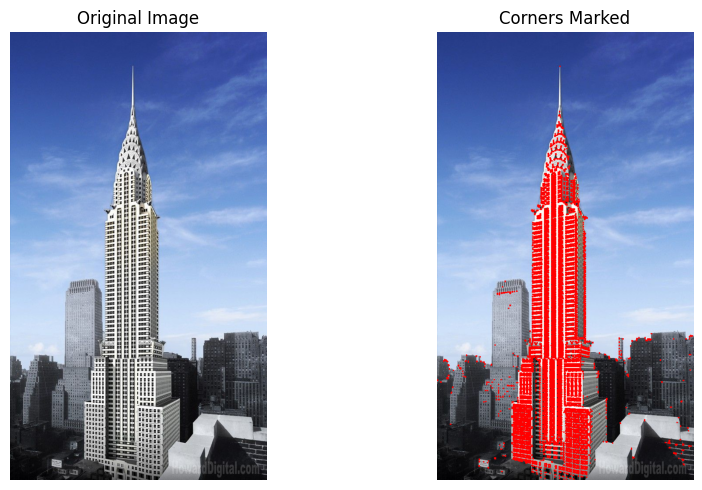

In [4]:
bnw_img = DATA_DIR + "chrysler.png"
original_image = cv2.imread(bnw_img)

marked_image, _ = detect_and_mark_corners(original_image, k=0.04)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
plt.title("Corners Marked")
plt.axis("off")

plt.tight_layout()
plt.show()

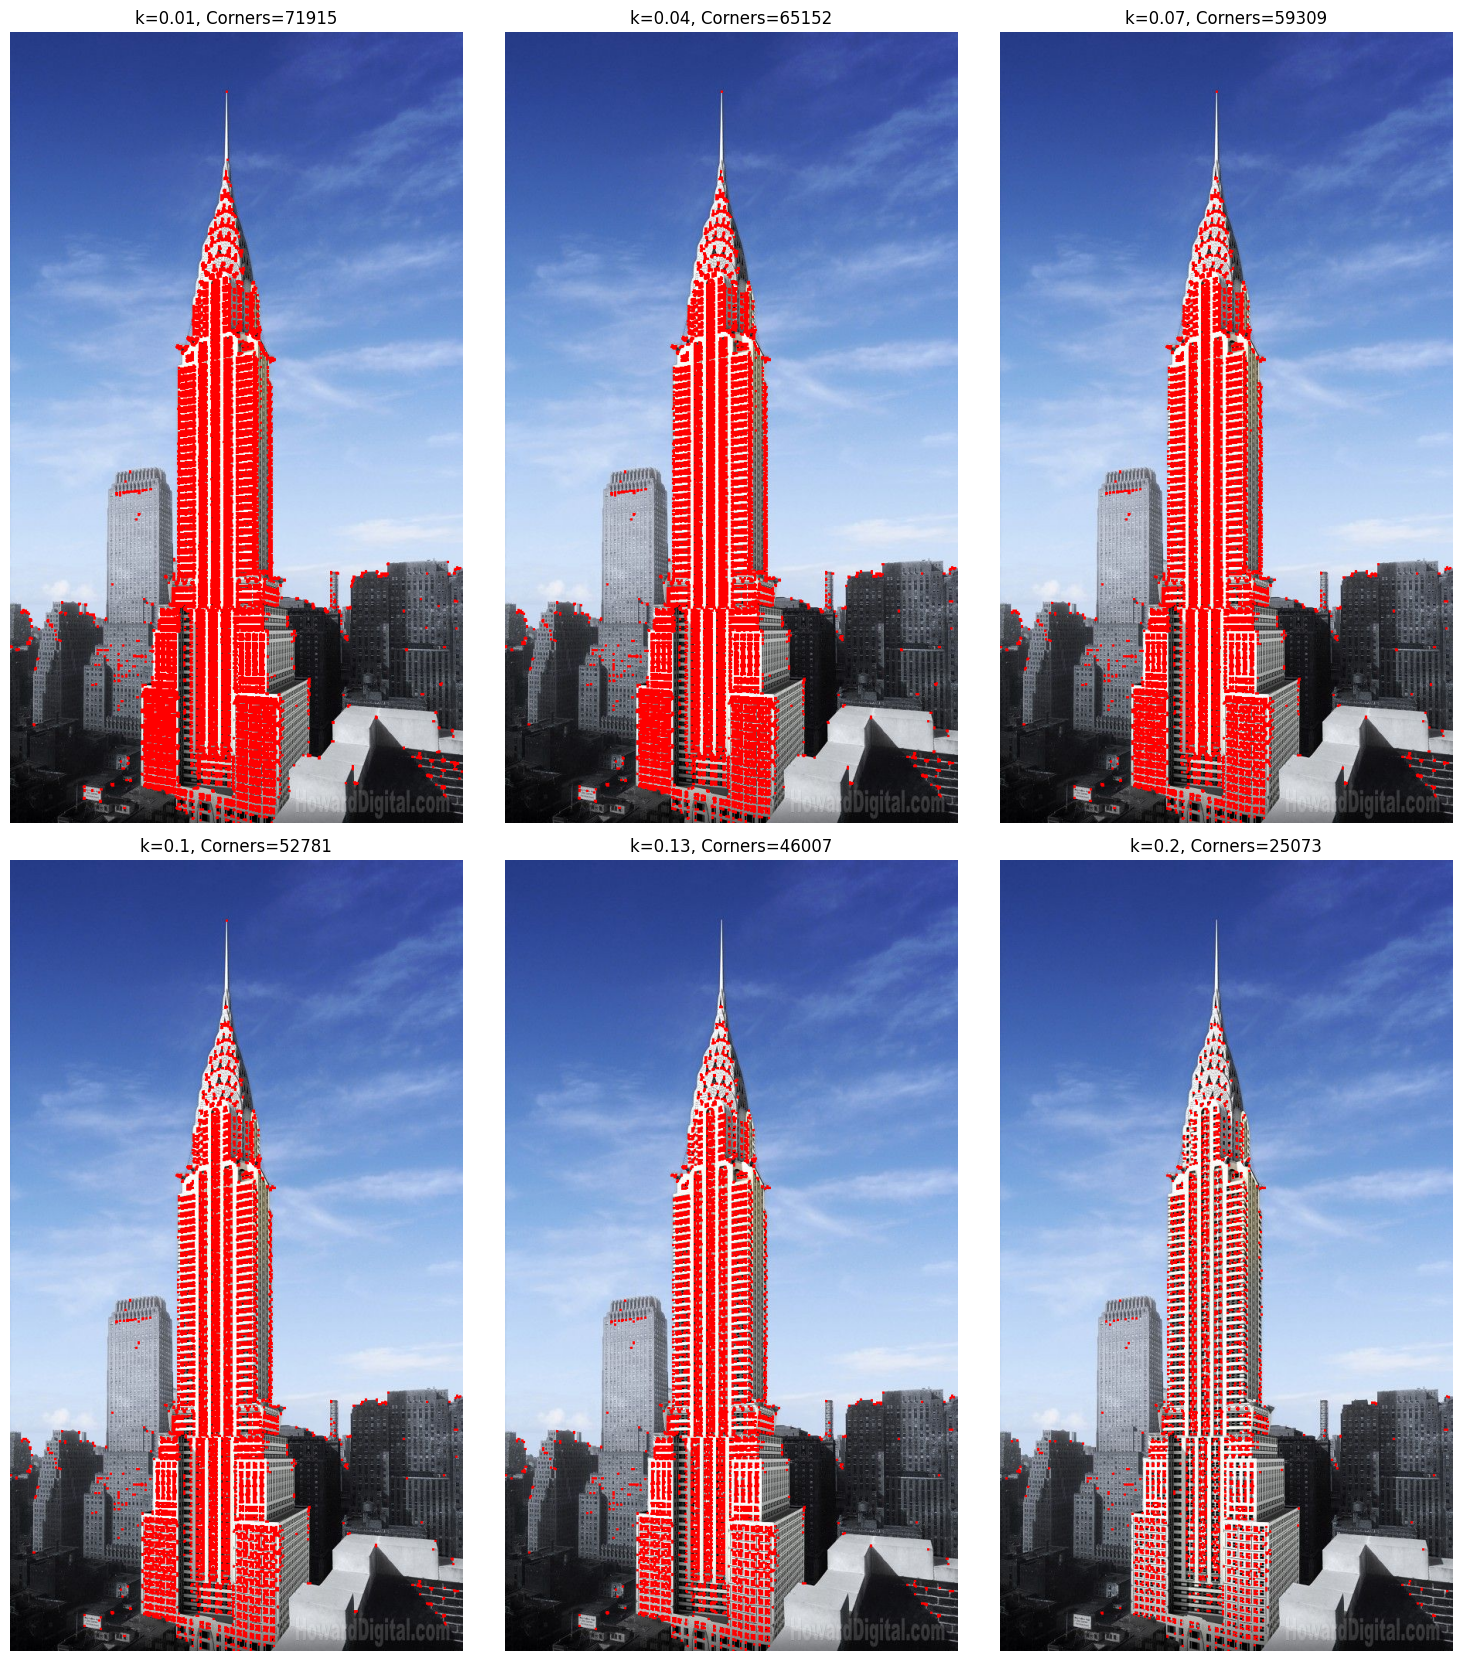

In [5]:
# Experiment with different values of k
sensitivity_values = [0.01, 0.04, 0.07, 0.1, 0.13, 0.2]
plt.figure(figsize=(15, 25))
for i, k in enumerate(sensitivity_values):
    marked_image, num_corners = detect_and_mark_corners(original_image, k=k)
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
    plt.title(f"k={k}, Corners={num_corners}")
    plt.axis("off")

plt.tight_layout()
plt.show()

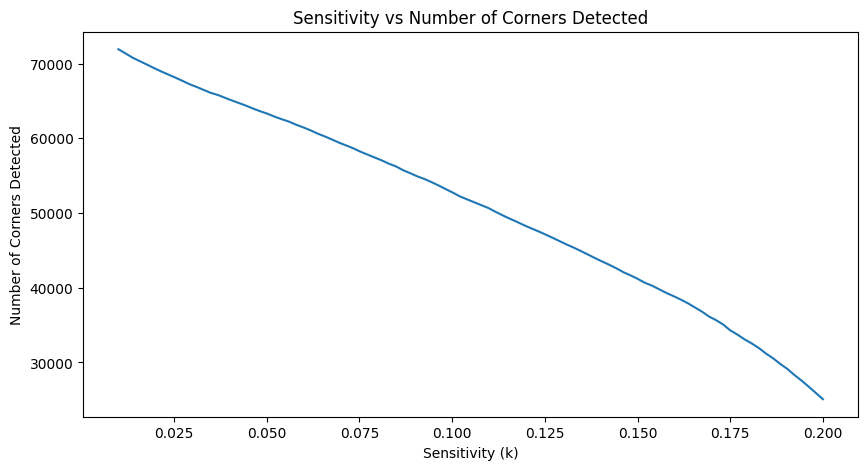

In [6]:
sensitivity_values = np.linspace(0.01, 0.2, 100)
num_corners = []
for k in sensitivity_values:
    _, corners = detect_and_mark_corners(original_image, k=k)
    num_corners.append(corners)

plt.figure(figsize=(10, 5))
plt.plot(sensitivity_values, num_corners)
plt.xlabel("Sensitivity (k)")
plt.ylabel("Number of Corners Detected")

plt.title("Sensitivity vs Number of Corners Detected")
plt.show()

## Observations:

1. <strong>Inverse Relationship b.w. corner detection and `k`:</strong>

- As the sensitivity parameter (k) increases, the number of detected corners decreases. This happens because a higher value of k makes the Harris Corner Detector more selective, only identifying stronger and more prominent corners.

2. <strong>Optimal Sensitivity:</strong>

- At lower values of k (e.g., around 0.02), the detector identifies many corners, including potential false positives or noisy responses.
- At higher values of k (e.g., above 0.15), the detector focuses on distinct corners but may miss weaker or less prominent ones.

3. <strong>Trade-Off:</strong>
- There is a pretty straight-forward trade-off between the sensitivity parameter and corner detection. Lower k values result in higher sensitivity to corner-like structures, while higher k values prioritize precision over quantity.